# Entrega Nº6

## Confounders - Dataset Flights

## Introduccion

En esta entrega, se quiere lograr detectar variables que confundan en el análisis de nuestro dataset. Este tipo de variables se las conoce como Confounders. A continuación se realizan dos análisis distintos para poder identificar esta variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams.update({'font.size': 16})

In [2]:
def lineal_reg_analysis(df, X, y, output = False):
    regresion_lineal = LinearRegression()
    y_arr = np.array(df[y]) # Y
    X_arr = np.array(df[X]).reshape(-1, 1) # X
    regresion_lineal.fit(X=X_arr, y=y_arr)


    y_arr_pred = regresion_lineal.predict(X_arr)
    mse = mean_squared_error(y_true=y_arr, y_pred=y_arr_pred)
    rmse = np.sqrt(mse) # La raíz cuadrada del MSE es el RMSE

    r2 = regresion_lineal.score(X_arr, y_arr)
    
    if output:
        print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
        print('Error Cuadrático Medio (MSE) = ' + str(mse))
        print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
        print('Coeficiente de Determinación R2 = ' + str(r2))
    
    return y_arr, y_arr_pred, X_arr

In [3]:
df = pd.read_csv('./data/flights.csv', index_col=0)
df.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [4]:
# Chequeo valores NaN en cada feature
df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [5]:
# Elimino filas que tengan NaN en dep_delay y arr_delay. Rechequeo valores
df.dropna(subset=['dep_delay', 'arr_delay'], inplace=True)
df.isna().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

In [6]:
sns.set(rc={'figure.figsize': (14, 16)})

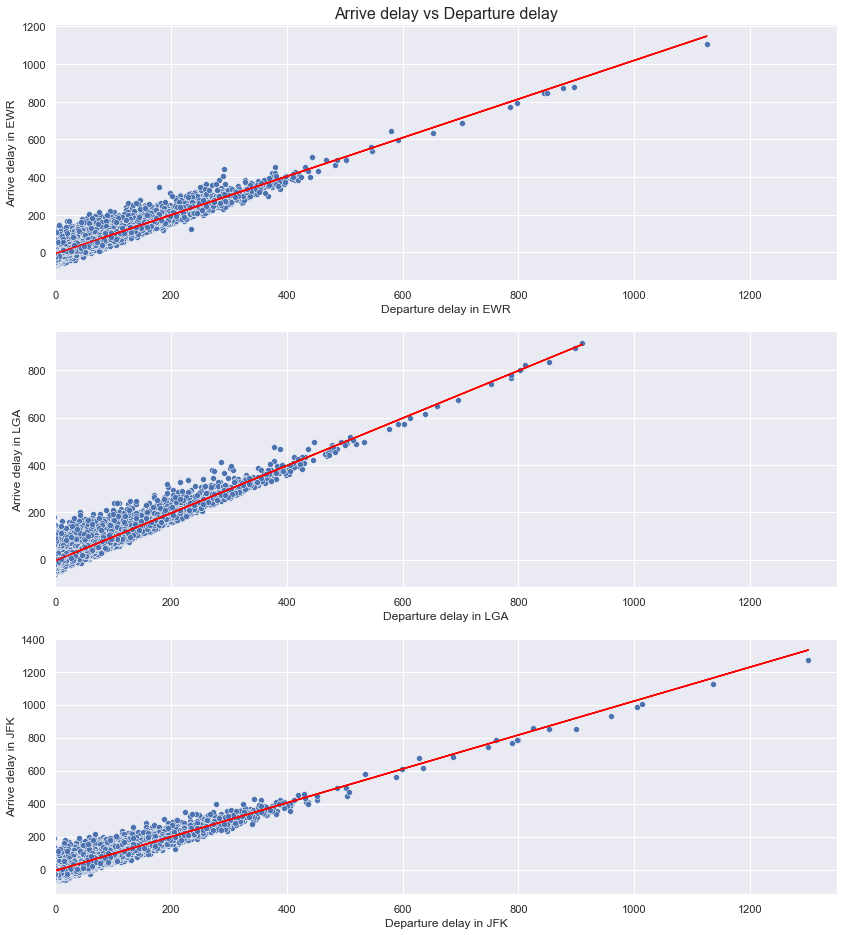

In [26]:
for i, origin in enumerate(df["origin"].unique()):
    y_arr, y_arr_pred, X_arr = lineal_reg_analysis(df=df[df["origin"] == origin], X="dep_delay", y="arr_delay")
    ax = plt.subplot(3, 1, i + 1, xlim=(0, 1350), xlabel=f"Departure delay in {origin}", ylabel=f"Arrive delay in {origin}")
    sns.scatterplot(
        data=df[df["origin"] == origin],
        x="dep_delay",
        y="arr_delay",
    )
    plt.plot(X_arr, y_arr_pred, color='red')
    if i == 0:
        plt.title("Arrive delay vs Departure delay", fontsize=16)

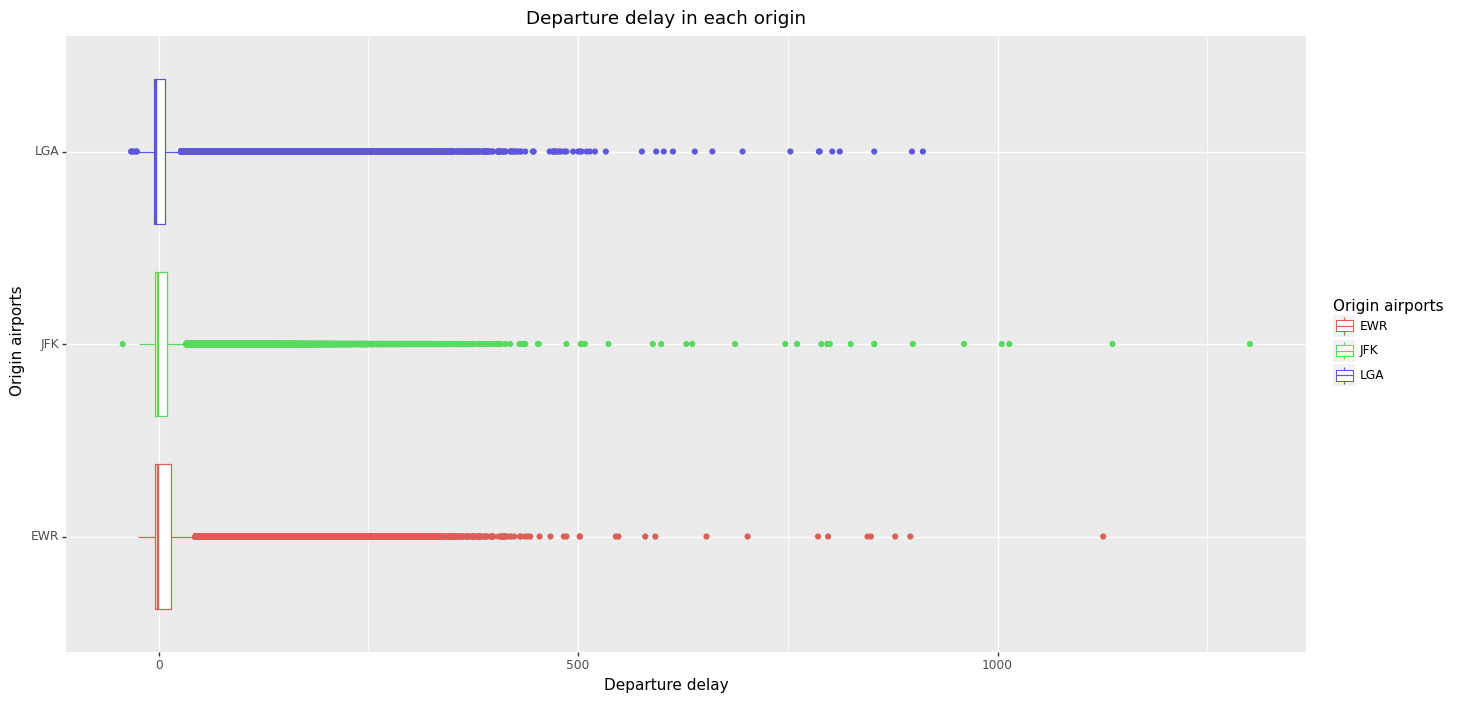

<ggplot: (160390640198)>

In [8]:
(
    ggplot(df)
    + geom_boxplot(aes(x="origin", y="dep_delay", color='origin'))
    + coord_flip()
    + theme(figure_size=(16, 8))
    + labs(x="Origin airports", y="Departure delay", title="Departure delay in each origin", color="Origin airports")
)

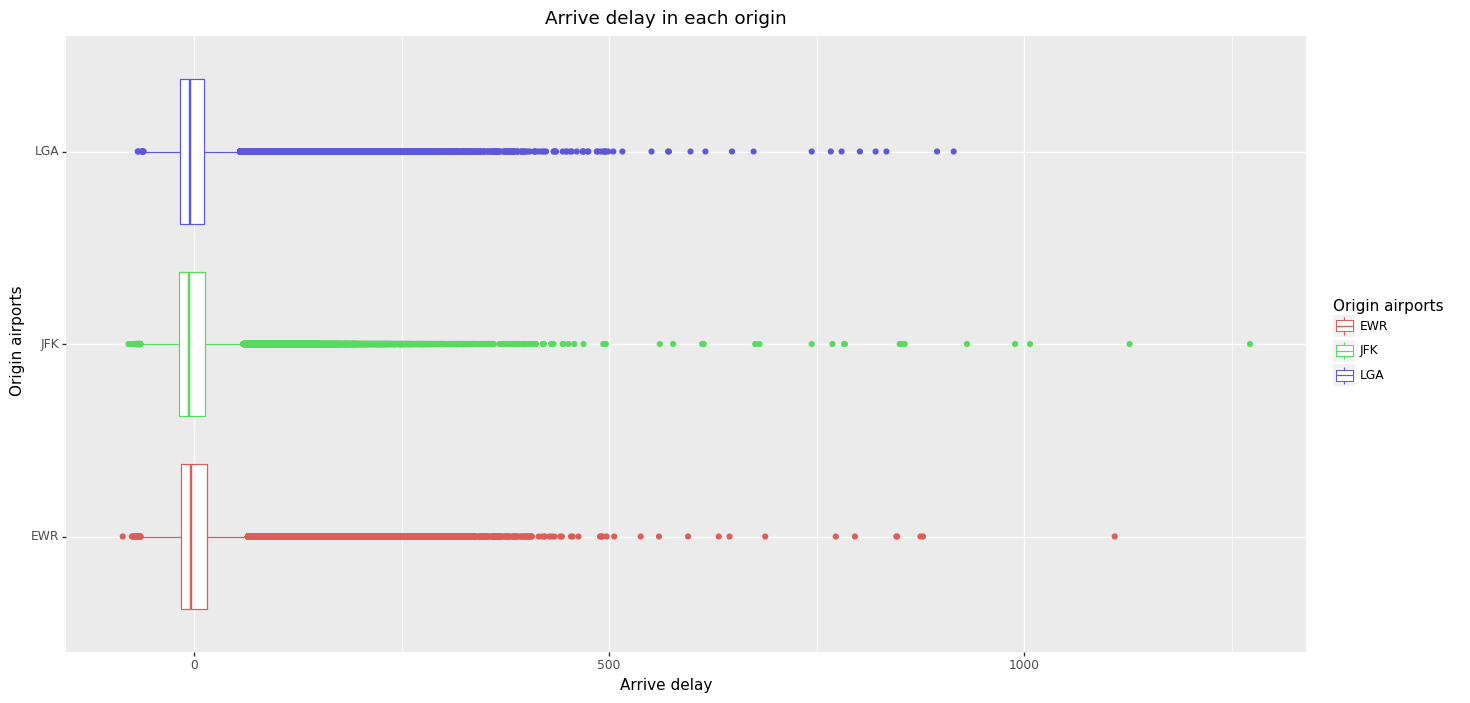

<ggplot: (160390656925)>

In [9]:
(
    ggplot(df)
    + geom_boxplot(aes(x="origin", y="arr_delay", color='origin'))
    + coord_flip()
    + theme(figure_size=(16, 8))
    + labs(x="Origin airports", y="Arrive delay", title="Arrive delay in each origin", color="Origin airports")
)

# Punto 2

In [10]:
df["dep_delay_air"] = df["dep_delay"] + df["air_time"]

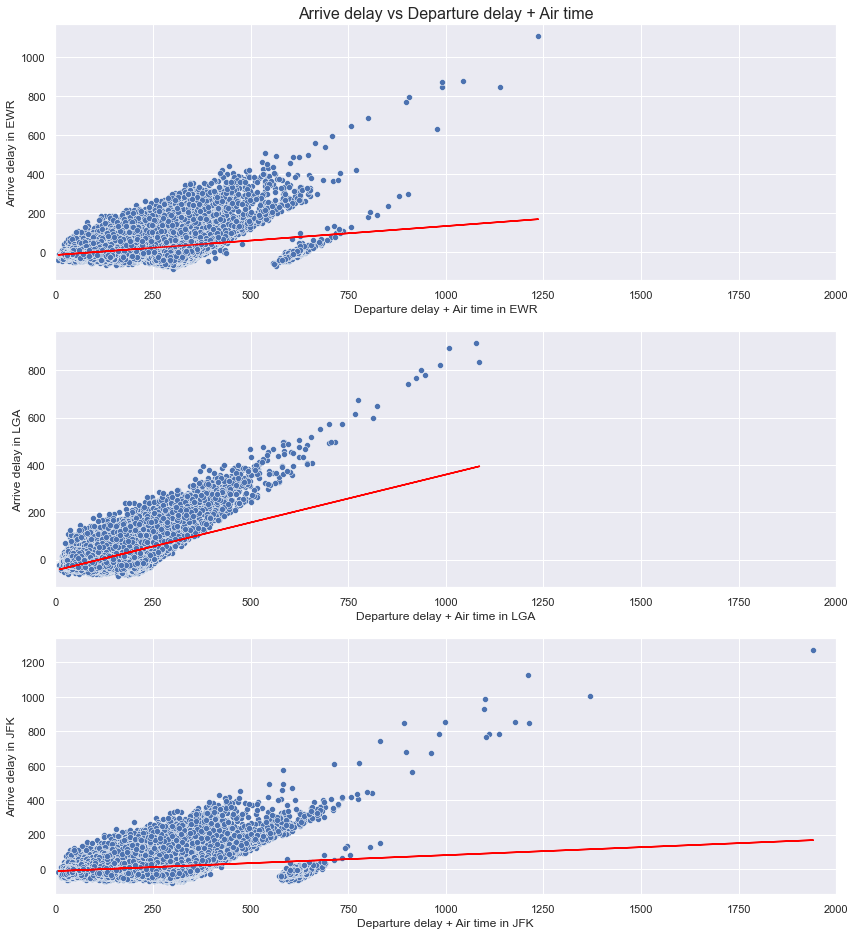

In [25]:
sns.set(rc={'figure.figsize': (14, 16)})
for i, origin in enumerate(df["origin"].unique()):
    y_arr, y_arr_pred, X_arr = lineal_reg_analysis(df=df[df["origin"] == origin], X="dep_delay_air", y="arr_delay")
    ax = plt.subplot(3, 1, i + 1, xlim=(0, 2000), xlabel=f"Departure delay + Air time in {origin}", ylabel=f"Arrive delay in {origin}")
    sns.scatterplot(
        data=df[df["origin"] == origin],
        x="dep_delay_air",
        y="arr_delay",
    )
    plt.plot(X_arr, y_arr_pred, color='red')
    if i == 0:
        plt.title("Arrive delay vs Departure delay + Air time", fontsize=16)

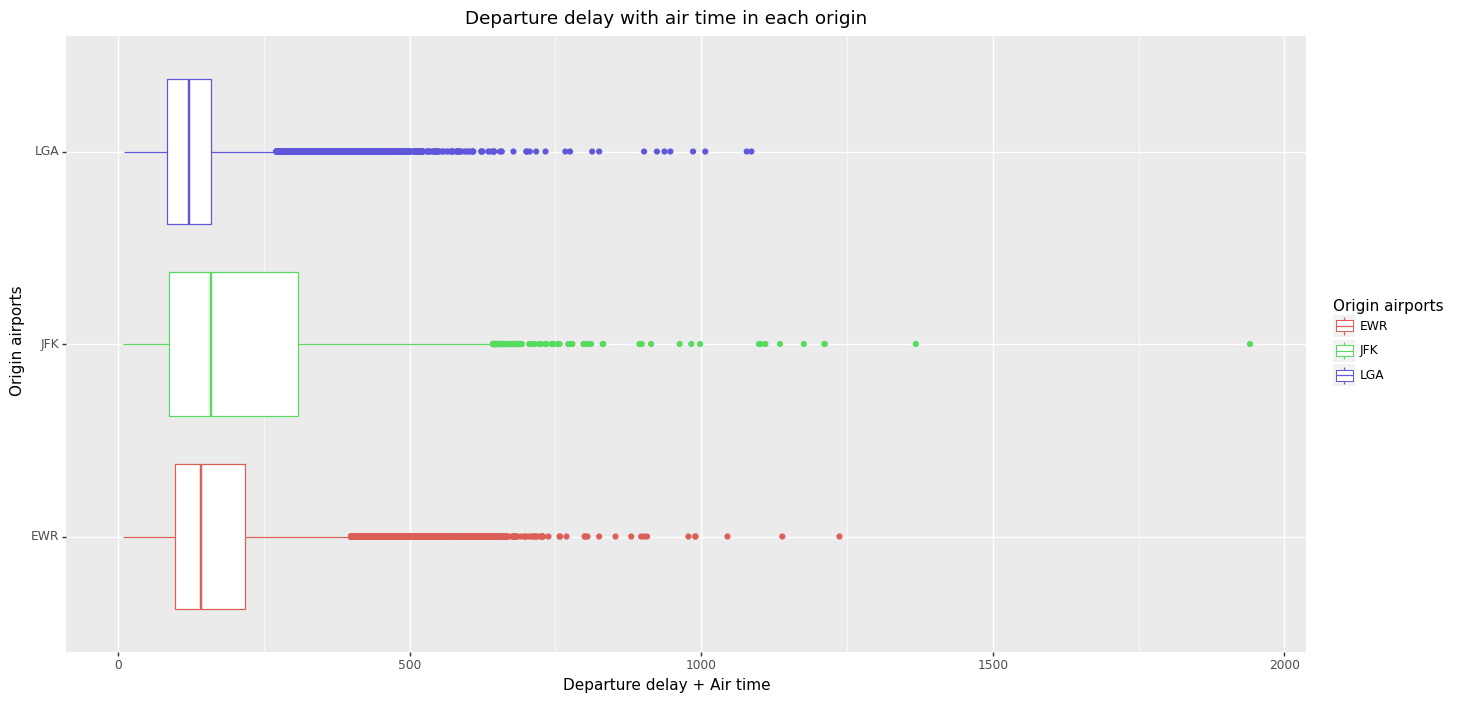

<ggplot: (160390908028)>

In [24]:
(
    ggplot(df)
    + geom_boxplot(aes(x="origin", y="dep_delay_air", color='origin'))
    + coord_flip()
    + theme(figure_size=(16, 8))
    + labs(x="Origin airports", y="Departure delay + Air time", title="Departure delay with air time in each origin", color="Origin airports") 
)